In [1]:
from utils import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

### Optimization results

In [2]:
df_ASAP =   pd.read_csv('./../ExpLogs/summ_c_ASAP.csv')
df_NoV2G =  pd.read_csv('./../ExpLogs/summ_c_NoV2G.csv')
df_Optim =  pd.read_csv('./../ExpLogs/summ_c_Optim.csv')
df_Optim1 = pd.read_csv('./../ExpLogs/summ_c2_Optim.csv')

df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim, df_Optim1], axis=0).reset_index(drop=True)
df_res

,name,transf,client,payoff,total
0,c_ASAP,14937.478645,18301.238246,0.000000,3363.759602
1,c_NoV2G,7522.477944,18301.238246,0.000000,10778.760303
2,c_Optim,6181.244077,18301.238246,1535.183674,10584.810496
3,c2_Optim,4356.432017,18301.238246,1253.999285,12690.806944


In [26]:
df_summ_jan_ASAP  = pd.read_csv('./../ExpLogs/summ_jan_ASAP.csv')  
df_summ_jan_NoV2G = pd.read_csv('./../ExpLogs/summ_jan_NoV2G.csv')  
df_summ_jan_Optim = pd.read_csv('./../ExpLogs/summ_jan_Optim.csv')  
df_summ_feb_ASAP  = pd.read_csv('./../ExpLogs/summ_feb_ASAP.csv')  
df_summ_feb_NoV2G = pd.read_csv('./../ExpLogs/summ_feb_NoV2G.csv')  
df_summ_feb_Optim = pd.read_csv('./../ExpLogs/summ_feb_Optim.csv')  
df_summ_mar_ASAP  = pd.read_csv('./../ExpLogs/summ_mar_ASAP.csv')  
df_summ_mar_NoV2G = pd.read_csv('./../ExpLogs/summ_mar_NoV2G.csv')  
df_summ_mar_Optim = pd.read_csv('./../ExpLogs/summ_mar_Optim.csv')  
df_summ_apr_ASAP  = pd.read_csv('./../ExpLogs/summ_apr_ASAP.csv')  
df_summ_apr_NoV2G = pd.read_csv('./../ExpLogs/summ_apr_NoV2G.csv')  
df_summ_apr_Optim = pd.read_csv('./../ExpLogs/summ_apr_Optim.csv')  
df_jan_ASAP = pd.read_csv('./../ExpLogs/jan_ASAP.csv')
df_jan_NoV2G = pd.read_csv('./../ExpLogs/jan_NoV2G.csv')
df_jan_Optim = pd.read_csv('./../ExpLogs/jan_Optim.csv')
df_feb_ASAP = pd.read_csv('./../ExpLogs/feb_ASAP.csv')
df_feb_NoV2G = pd.read_csv('./../ExpLogs/feb_NoV2G.csv')
df_feb_Optim = pd.read_csv('./../ExpLogs/feb_Optim.csv')
df_mar_ASAP = pd.read_csv('./../ExpLogs/mar_ASAP.csv')
df_mar_NoV2G = pd.read_csv('./../ExpLogs/mar_NoV2G.csv')
df_mar_Optim = pd.read_csv('./../ExpLogs/mar_Optim.csv')
df_apr_ASAP = pd.read_csv('./../ExpLogs/apr_ASAP.csv')
df_apr_NoV2G = pd.read_csv('./../ExpLogs/apr_NoV2G.csv')
df_apr_Optim = pd.read_csv('./../ExpLogs/apr_Optim.csv')
df_summ_apr_Optim = pd.read_csv('./../ExpLogs/summ_apr_Optim.csv')
display(df_summ_apr_Optim.head())

,name,transf,client,payoff,total
0,apr_Optim,397.395422,1468.334912,148.508029,922.431461


,name,transf,client,payoff,total
0,apr_Optim,397.395422,1468.334912,148.508029,922.431461


In [5]:

df_ASAP =   pd.read_csv('./../ExpLogs/summ_nc_ASAP.csv')
df_NoV2G =  pd.read_csv('./../ExpLogs/summ_nc_NoV2G.csv')
df_Optim =  pd.read_csv('./../ExpLogs/summ_nc_Optim.csv')
df_Optim1 = pd.read_csv('./../ExpLogs/summ_nc2_Optim.csv')

df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim, df_Optim1], axis=0).reset_index(drop=True)
df_res

,name,transf,client,payoff,total
0,nc_ASAP,14937.478645,18301.238246,0.000000,3363.759602
1,nc_NoV2G,7522.477944,18301.238246,0.000000,10778.760303
2,nc_Optim,3595.171122,18301.238246,1733.129025,12972.938099
3,nc2_Optim,3595.171122,18301.238246,1733.129025,12972.938099


In [6]:
# Normalization dicts
optim_train = pd.read_csv("./../ExpLogs/train_Optim.csv")
optim_val = pd.read_csv("./../ExpLogs/val_Optim.csv")
optim_test = pd.read_csv("./../ExpLogs/test_Optim.csv")

nov2g_train = pd.read_csv("./../ExpLogs/train_NoV2G.csv")
nov2g_val =     pd.read_csv("./../ExpLogs/val_NoV2G.csv")
nov2g_test =   pd.read_csv("./../ExpLogs/test_NoV2G.csv")

asap_train = pd.read_csv("./../ExpLogs/train_ASAP.csv")
asap_val =     pd.read_csv("./../ExpLogs/val_ASAP.csv")
asap_test =   pd.read_csv("./../ExpLogs/test_ASAP.csv")


In [7]:
optim_test2 = pd.read_csv("./../ExpLogs/c2_Optim.csv")
optim_test2["imbalance_bill"].sum()

61681.70946062972

In [8]:
optim_test2.head()

,ts,arr_e_req,client_bill,assigned_type,realized_type,fail_time,fail_energy1,fail_energy2,fail_energy_both,fail_IR,chg_e_req,imbalance_bill,n_cars,avg_lax,payoff
0,166559.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.0,0.000000,NaN
1,166560.0,10.78,0.68992,[[0. 0. 1.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 1.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,-4.968767e-15,-2.305905e-13,1.0,0.240000,0.0
2,166561.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,1.100748e-14,3.773365e-13,1.0,0.200000,0.0
3,166562.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,-5.776229e-02,-2.708358e+00,1.0,0.142504,0.0
4,166563.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,7.747880e-11,2.684486e-09,1.0,0.102504,0.0


In [9]:
optim_test["imbalance_bill"].sum()

3595.171122161083

### RL Results

In [10]:
norm_dict = {"train": optim_train["imbalance_bill"].sum(), "val": optim_val["imbalance_bill"].sum(), "test": optim_test["imbalance_bill"].sum()}
month_norm_dict = {"train": optim_train["imbalance_bill"][:768].sum(), "val": optim_val["imbalance_bill"][:768].sum(), "test": optim_test["imbalance_bill"][:768].sum()}
##df_train, df_val, df_test = load_rl_gen("sac_gen_a", 34, norm_dict = norm_dict)
#df_m_train, df_m_val, df_m_test = load_rl_gen("month_sac_c", 697)

# Baseline
#df_res = load_rl("month_sac_c", 50) 
df_res = load_rl("month_sac_IX_j", 200) 

Text(0, 0.5, 'Imbalance Bill')

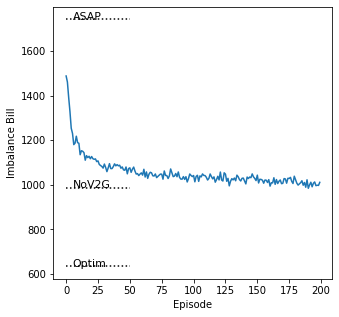

In [11]:
fig1, (ax1) = plt.subplots(1,1, figsize=(5,5))

ax1 = draw_hlines(ax1, asap_test["imbalance_bill"][:768].sum(), nov2g_test["imbalance_bill"][:768].sum(), optim_test["imbalance_bill"][:768].sum(), x_max = 50)
ax1.plot(df_res["transf"])
ax1.set_ylabel("Imbalance Bill")

## 1 month train

In [27]:
dfs_Gc = load_rl_gen("month_sac_gen_G_c", 300, val=False)
dfs_Gd = load_rl_gen("month_sac_gen_G_d", 300, val=False)
dfs_Ge = load_rl_gen("month_sac_gen_G_e", 300, val=False)

In [28]:
dfs_Gc[0].head()

,name,transf,client,payoff,total,sessions
0,train_month_sac_gen_G_c_0,946.304780,1488.309120,159.961502,382.042839,df_elaad_preproc_mar.csv
1,train_month_sac_gen_G_c_1,952.825783,1488.309120,155.628335,379.855002,df_elaad_preproc_mar.csv
2,train_month_sac_gen_G_c_2,854.094930,1349.047258,118.920792,376.031536,df_elaad_preproc_feb.csv
3,train_month_sac_gen_G_c_3,851.883889,1488.309120,159.828017,476.597214,df_elaad_preproc_mar.csv
4,train_month_sac_gen_G_c_4,804.579168,1349.047258,122.054447,422.413643,df_elaad_preproc_feb.csv


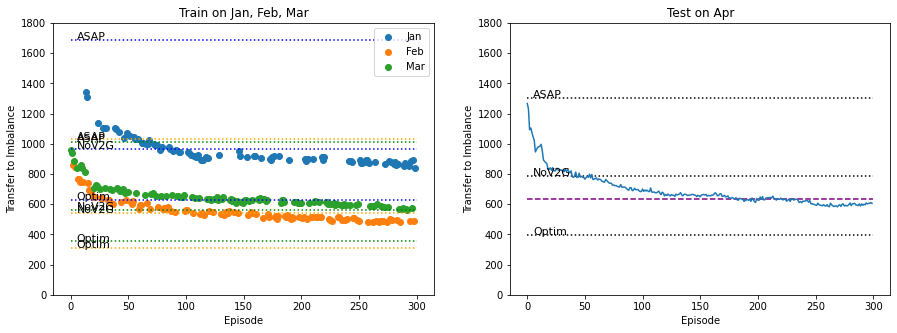

In [36]:
fig1, (ax1, ax2) =  plt.subplots(1,2, figsize=(15,5)) #, sharey = True)

ax1 = draw_hlines(ax1, df_jan_ASAP["imbalance_bill"].sum(), df_jan_NoV2G["imbalance_bill"].sum(), df_jan_Optim["imbalance_bill"].sum(), color='blue', x_max = 300)
ax1 = draw_hlines(ax1, df_feb_ASAP["imbalance_bill"].sum(), df_feb_NoV2G["imbalance_bill"].sum(), df_feb_Optim["imbalance_bill"].sum(), color='orange', x_max = 300)
ax1 = draw_hlines(ax1, df_mar_ASAP["imbalance_bill"].sum(), df_mar_NoV2G["imbalance_bill"].sum(), df_mar_Optim["imbalance_bill"].sum(), color='green', x_max = 300)

ax2 = draw_hlines(ax2, df_apr_ASAP["imbalance_bill"].sum(), df_apr_NoV2G["imbalance_bill"].sum(), df_apr_Optim["imbalance_bill"].sum(), x_max = 300)
ax2.hlines(df_apr_NoV2G["imbalance_bill"].sum()-148, 0, 300, label="To win profitablilty", color="purple", ls="--")
plot_rl_gen_stoc(ax1, ax2, dfs_Ge)
ax2.set_ylim([0, 1800])
ax1.set_ylim([0, 1800])
ax1.set_title("Train on Jan, Feb, Mar")
ax2.set_title("Test on Apr")
ax1.set_ylabel("Transfer to Imbalance")
ax2.set_ylabel("Transfer to Imbalance")

ax1.legend()

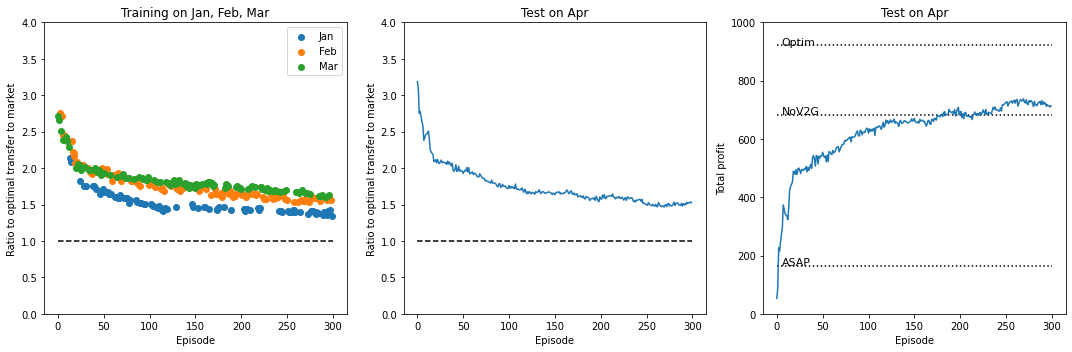

In [35]:

fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)

#ax1 = draw_hlines(ax1, df_jan_ASAP["imbalance_bill"].sum(), df_jan_NoV2G["imbalance_bill"].sum(), df_jan_Optim["imbalance_bill"].sum(), color='blue', x_max = 200)
#ax1 = draw_hlines(ax1, df_feb_ASAP["imbalance_bill"].sum(), df_feb_NoV2G["imbalance_bill"].sum(), df_feb_Optim["imbalance_bill"].sum(), color='orange', x_max = 200)
#ax1 = draw_hlines(ax1, df_mar_ASAP["imbalance_bill"].sum(), df_mar_NoV2G["imbalance_bill"].sum(), df_mar_Optim["imbalance_bill"].sum(), color='green', x_max = 200)
norm_dict = {"jan": df_jan_Optim["imbalance_bill"].sum(), "feb": df_feb_Optim["imbalance_bill"].sum(), "mar": df_mar_Optim["imbalance_bill"].sum(), "apr": df_apr_Optim["imbalance_bill"].sum()}

ax3 = draw_hlines(ax3, df_summ_apr_ASAP["total"].sum(), df_summ_apr_NoV2G["total"].sum(), df_summ_apr_Optim["total"].sum(), x_max = 300)
ax1.hlines(1, 0, 300, color="k", ls="--")
ax2.hlines(1, 0, 300, color="k", ls="--")
plot_rl_gen_stoc(ax1, ax2, dfs_Ge, norm_dict=norm_dict, ax3=ax3)
ax1.set_ylim([0, 4])
ax2.set_ylim([0, 4])
ax3.set_ylim([0, 1000])
ax1.legend()
ax1.set_xlabel("Episode")
ax2.set_xlabel("Episode")
ax1.set_ylabel("Ratio to optimal transfer to market")
ax2.set_ylabel("Ratio to optimal transfer to market")
ax3.set_ylabel("Total profit")
ax1.set_title("Training on Jan, Feb, Mar")
ax2.set_title("Test on Apr")
ax3.set_title("Test on Apr")

fig1.tight_layout()


## Big gen

In [16]:
dfs_Ia = load_rl_gen("month_sac_gen_I_a", 500) # Vanilla
dfs_Ib = load_rl_gen("month_sac_gen_I_b", 500) # --disagg LL
dfs_Ic = load_rl_gen("month_sac_gen_I_c", 500) # --batch-size 128
dfs_Id = load_rl_gen("month_sac_gen_I_d", 500) # --batch-size 512
dfs_Ie = load_rl_gen("month_sac_gen_I_e", 500) # --learning-starts 0 
dfs_If = load_rl_gen("month_sac_gen_I_f", 500) # --learning-starts 72
dfs_Ig = load_rl_gen("month_sac_gen_I_g", 500) # --gamma 1.00
dfs_Ih = load_rl_gen("month_sac_gen_I_h", 500) # --gamma 0.95
dfs_Ii = load_rl_gen("month_sac_gen_I_i", 500) # --gamma 0.90
dfs_Ij = load_rl_gen("month_sac_gen_I_j", 500) # --tau 0.1
dfs_Ik = load_rl_gen("month_sac_gen_I_k", 500) # --tau 0.01
dfs_Il = load_rl_gen("month_sac_gen_I_l", 500) # --tau 0.001
dfs_Im = load_rl_gen("month_sac_gen_I_m", 500) # --tau 0.0001
dfs_In = load_rl_gen("month_sac_gen_I_n", 500) # --alpha 0.1
dfs_Io = load_rl_gen("month_sac_gen_I_o", 500) # --alpha 0.3
dfs_Ip = load_rl_gen("month_sac_gen_I_p", 500) # --alpha 0.4
dfs_Iq = load_rl_gen("month_sac_gen_I_q", 500) # --alpha 0.5
dfs_Ir = load_rl_gen("month_sac_gen_I_r", 500) # --rng-test True
dfs_Is = load_rl_gen("month_sac_gen_I_s", 500) # --price-noise 1
dfs_It = load_rl_gen("month_sac_gen_I_t", 500) # --rng-test True --price-noise 1 
dfs_Iu = load_rl_gen("month_sac_gen_I_u", 500) # --price-noise 3
dfs_Iv = load_rl_gen("month_sac_gen_I_v", 500) # --rng-test True --price-noise 3  
dfs_Iw = load_rl_gen("month_sac_gen_I_w", 500) # --price-noise 10
dfs_Ix = load_rl_gen("month_sac_gen_I_x", 500) # --rng-test True --price-noise 10 
dfs_Iy = load_rl_gen("month_sac_gen_I_y", 500) # --rng-test True --price-noise 3 --tau 0.01 
dfs_Iz = load_rl_gen("month_sac_gen_I_z", 500) # --rng-test True --price-noise 3 --alpha 0.4
dfs_Ja = load_rl_gen("month_sac_gen_J_a", 500) # --policy-lr 0.0001 
dfs_Jb = load_rl_gen("month_sac_gen_J_b", 500) # --policy-lr 0.001 
dfs_Jc = load_rl_gen("month_sac_gen_J_c", 500) # --q-lr 0.0003 
dfs_Jd = load_rl_gen("month_sac_gen_J_d", 500) # --q-lr 0.003 
dfs_Je = load_rl_gen("month_sac_gen_J_e", 500) # --policy-frequency 1 
dfs_Jf = load_rl_gen("month_sac_gen_J_f", 500) # --policy-frequency 4 
dfs_Jg = load_rl_gen("month_sac_gen_J_g", 500) # --target-network-frequency 2                             
dfs_Jh = load_rl_gen("month_sac_gen_J_h", 500) # --batch-size 1024 
dfs_Ji = load_rl_gen("month_sac_gen_J_i", 500) # --batch-size 2048 
dfs_Jj = load_rl_gen("month_sac_gen_J_j", 500) # --alpha 0.05 
dfs_Jk = load_rl_gen("month_sac_gen_J_k", 500) # --alpha 0.03 
dfs_Jl = load_rl_gen("month_sac_gen_J_l", 500) # --alpha 0.01 
dfs_Jm = load_rl_gen("month_sac_gen_J_m", 500) # --alpha 0.003 
dfs_Jn = load_rl_gen("month_sac_gen_J_n", 500) # --alpha 0.001 
dfs_Jo = load_rl_gen("month_sac_gen_J_o", 500) # --policy-frequency 8 
dfs_Jp = load_rl_gen("month_sac_gen_J_p", 500) # --policy-frequency 16 
dfs_Jq = load_rl_gen("month_sac_gen_J_q", 500) # --target-network-frequency 4 
dfs_Jr = load_rl_gen("month_sac_gen_J_r", 500) # --target-network-frequency 8 
dfs_Js = load_rl_gen("month_sac_gen_J_s", 500) # --batch-size 512 --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2
dfs_Jt = load_rl_gen("month_sac_gen_J_t", 500) # --batch-size 512 --learning-starts 0 
dfs_Ju = load_rl_gen("month_sac_gen_J_u", 500) # --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2 
dfs_Jv = load_rl_gen("month_sac_gen_J_v", 500) # --batch-size 512 --learning-starts 0 --policy-frequency 4 --target-network-frequency 2 
dfs_Jw = load_rl_gen("month_sac_gen_J_w", 500) # --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4                                              

dfs_Jx = load_rl_gen("month_sac_gen_J_x", 300) # -- Vanilla 2
dfs_Jy = load_rl_gen("month_sac_gen_J_y", 300) # --batch-size 512 --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Jz = load_rl_gen("month_sac_gen_J_z", 300) # --batch-size 512 --learning-starts 0 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Ga = load_rl_gen("month_sac_gen_G_a", 300) # --batch-size 512 --learning-starts 0 --alpha 0.1  --tau 0.0001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Gb = load_rl_gen("month_sac_gen_G_b", 300) # --batch-size 512 --learning-starts 8 --alpha 0.1  --tau 0.0001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &

dfs_gen = [ dfs_Ia, dfs_Ib, dfs_Ic, dfs_Id, dfs_Ie, dfs_If, dfs_Ig, dfs_Ih, dfs_Ii, dfs_Ij, dfs_Ik, dfs_Il, dfs_Im, dfs_In, dfs_Io, dfs_Ip, dfs_Iq, dfs_Ir,
dfs_Is, dfs_It, dfs_Iu, dfs_Iv, dfs_Iw, dfs_Ix, dfs_Iy, dfs_Iz, dfs_Ja, dfs_Jb, dfs_Jc, dfs_Jd, dfs_Je, dfs_Jf, dfs_Jg, dfs_Jh, dfs_Ji, dfs_Jj, dfs_Jk, dfs_Jl,
dfs_Jm, dfs_Jn, dfs_Jo, dfs_Jp, dfs_Jq, dfs_Jr, dfs_Js, dfs_Jt, dfs_Ju, dfs_Jv, dfs_Jw, dfs_Jx, dfs_Jy, dfs_Jz, dfs_Ga, dfs_Gb,]


names = [ "I_a", "I_b", "I_c", "I_d", "I_e", "I_f", "I_g", "I_h", "I_i", "I_j", "I_k", "I_l", "I_m", "I_n", "I_o", "I_p", "I_q", "I_r", "I_s", "I_t", "I_u",
"I_v", "I_w", "I_x", "I_y", "I_z", "J_a", "J_b", "J_c", "J_d", "J_e", "J_f", "J_g", "J_h", "J_i", "J_j", "J_k", "J_l", "J_m", "J_n", "J_o", "J_p", "J_q",
"J_r", "J_s", "J_t", "J_u", "J_v", "J_w", "J_x", "J_y", "J_z", "G_a", "G_b", ]






In [17]:
data = []
for i, df in enumerate(dfs_gen):
    data.append([names[i], dfs_gen[i][2]["transf"].min()])

df_gen = pd.DataFrame(data, columns=["name", "min_transf"])
df_gen.sort_values(by = ["min_transf"], ascending=True).head()


,name,min_transf
44,J_s,563.381021
46,J_u,575.300503
48,J_w,576.996827
51,J_z,580.700782
52,G_a,606.524336


In [18]:
df_jan_ASAP.head()

,ts,arr_e_req,client_bill,assigned_type,realized_type,fail_time,fail_energy1,fail_energy2,fail_energy_both,fail_IR,chg_e_req,imbalance_bill,n_cars,avg_lax,payoff
0,166559.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.00000,0.0,0.000000,NaN
1,166560.0,10.78,0.68992,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.1375,0.63811,1.0,0.233333,0.0
2,166561.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,1.0,0.200000,0.0
3,166562.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,1.0,0.166667,0.0
4,166563.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,1.0,0.133333,0.0


Text(0.5, 1.0, 'Val Mar 2019')

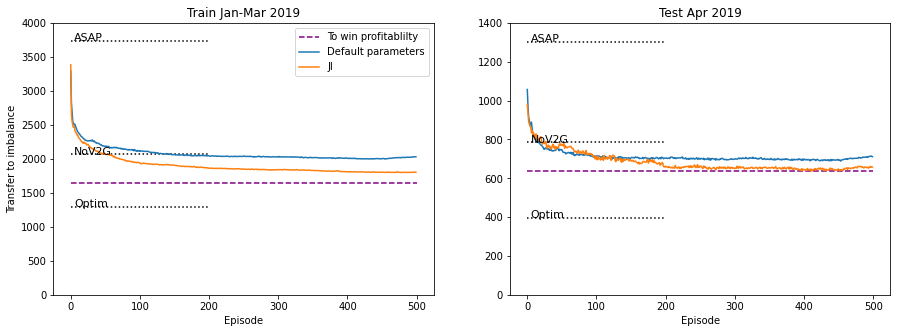

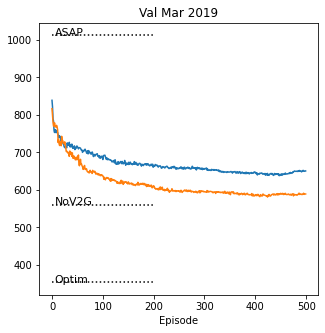

In [38]:

fig1, (ax1, ax2) =  plt.subplots(1,2, figsize=(15,5)) #, sharey = True)
fig2, ax2b = plt.subplots(1,1, figsize=(5,5))

train_asap = df_jan_ASAP["imbalance_bill"].sum() + df_feb_ASAP["imbalance_bill"].sum() + df_mar_ASAP["imbalance_bill"].sum()
train_nov2g = df_jan_NoV2G["imbalance_bill"].sum() + df_feb_NoV2G["imbalance_bill"].sum() + df_mar_NoV2G["imbalance_bill"].sum()
train_optim = df_jan_Optim["imbalance_bill"].sum() + df_feb_Optim["imbalance_bill"].sum() + df_mar_Optim["imbalance_bill"].sum()
train_payoff = df_jan_Optim["payoff"].sum() + df_feb_Optim["payoff"].sum() + df_mar_Optim["payoff"].sum()

ax1 = draw_hlines(ax1, train_asap, train_nov2g, train_optim, x_max = 200)
ax2b = draw_hlines(ax2b, df_mar_ASAP["imbalance_bill"].sum(), df_mar_NoV2G["imbalance_bill"].sum(), df_mar_Optim["imbalance_bill"].sum(), x_max = 200)
ax2 = draw_hlines(ax2, df_apr_ASAP["imbalance_bill"].sum(), df_apr_NoV2G["imbalance_bill"].sum(), df_apr_Optim["imbalance_bill"].sum(), x_max = 200)
ax2.hlines(df_apr_NoV2G["imbalance_bill"].sum()-148, 0, 500, label="To win profitablilty", color="purple", ls="--")
ax1.hlines(train_nov2g-train_payoff, 0, 500, label="To win profitablilty", color="purple", ls="--")

plot_rl_gen(ax1, ax2b, ax2, dfs_Ia[0], dfs_Ia[1], dfs_Ia[2], label="Default parameters")
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ib[0], dfs_Ib[1], dfs_Ib[2], label="Ib") # --disagg LL
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ic[0], dfs_Ic[1], dfs_Ic[2], label="Ic") # --batch-size 128
#plot_rl_gen(ax1, ax2b, ax2, dfs_Id[0], dfs_Id[1], dfs_Id[2], label="Id") # --batch-size 512
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ie[0], dfs_Ie[1], dfs_Ie[2], label="Ie") # --learning-starts 0 
#plot_rl_gen(ax1, ax2b, ax2, dfs_If[0], dfs_If[1], dfs_If[2], label="If") # --learning-starts 72
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ig[0], dfs_Ig[1], dfs_Ig[2], label="Ig") # --gamma 1.00
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ih[0], dfs_Ih[1], dfs_Ih[2], label="Ih") # --gamma 0.95
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ii[0], dfs_Ii[1], dfs_Ii[2], label="Ii") # --gamma 0.90
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ij[0], dfs_Ij[1], dfs_Ij[2], label="Ij") # --tau 0.1
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ik[0], dfs_Ik[1], dfs_Ik[2], label="Ik") # --tau 0.01
#plot_rl_gen(ax1, ax2b, ax2, dfs_Il[0], dfs_Il[1], dfs_Il[2], label="Il") # --tau 0.001
#plot_rl_gen(ax1, ax2b, ax2, dfs_Im[0], dfs_Im[1], dfs_Im[2], label="Im") # --tau 0.0001
#plot_rl_gen(ax1, ax2b, ax2, dfs_In[0], dfs_In[1], dfs_In[2], label="In") # --alpha 0.1
#plot_rl_gen(ax1, ax2b, ax2, dfs_Io[0], dfs_Io[1], dfs_Io[2], label="Io") # --alpha 0.3
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ip[0], dfs_Ip[1], dfs_Ip[2], label="Ip") # --alpha 0.4
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iq[0], dfs_Iq[1], dfs_Iq[2], label="Iq") # --alpha 0.5
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ir[0], dfs_Ir[1], dfs_Ir[2], label="Ir") # --rng-test True
#plot_rl_gen(ax1, ax2b, ax2, dfs_Is[0], dfs_Is[1], dfs_Is[2], label="Is") # --price-noise 1
#plot_rl_gen(ax1, ax2b, ax2, dfs_It[0], dfs_It[1], dfs_It[2], label="It") # --rng-test True --price-noise 1 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iu[0], dfs_Iu[1], dfs_Iu[2], label="Iu") # --price-noise 3
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iv[0], dfs_Iv[1], dfs_Iv[2], label="Iv") # --rng-test True --price-noise 3  
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iw[0], dfs_Iw[1], dfs_Iw[2], label="Iw") # --price-noise 10
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ix[0], dfs_Ix[1], dfs_Ix[2], label="Ix") # --rng-test True --price-noise 10 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iy[0], dfs_Iy[1], dfs_Iy[2], label="Iy") # --rng-test True --price-noise 3 --tau 0.01 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iz[0], dfs_Iz[1], dfs_Iz[2], label="Iz") # --rng-test True --price-noise 3 --alpha 0.4
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ja[0], dfs_Ja[1], dfs_Ja[2], label="Ja") # --policy-lr 0.0001 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jb[0], dfs_Jb[1], dfs_Jb[2], label="Jb") # --policy-lr 0.001 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jc[0], dfs_Jc[1], dfs_Jc[2], label="Jc") # --q-lr 0.0003 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jd[0], dfs_Jd[1], dfs_Jd[2], label="Jd") # --q-lr 0.003 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Je[0], dfs_Je[1], dfs_Je[2], label="Je") # --policy-frequency 1 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jf[0], dfs_Jf[1], dfs_Jf[2], label="Jf") # --policy-frequency 4 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jg[0], dfs_Jg[1], dfs_Jg[2], label="Jg") # --target-network-frequency 2                            

#plot_rl_gen(ax1, ax2b, ax2, dfs_Jh[0], dfs_Jh[1], dfs_Jh[2], label="Jh") # --batch-size 1024                                                                                                  
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ji[0], dfs_Ji[1], dfs_Ji[2], label="Ji") # --batch-size 2048                                                                                                  
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jj[0], dfs_Jj[1], dfs_Jj[2], label="Jj") # --alpha 0.05                                                                                                       
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jk[0], dfs_Jk[1], dfs_Jk[2], label="Jk") # --alpha 0.03                                                                                                       
plot_rl_gen(ax1, ax2b, ax2, dfs_Jl[0], dfs_Jl[1], dfs_Jl[2], label="Jl") # --alpha 0.01                                                                                                       
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jm[0], dfs_Jm[1], dfs_Jm[2], label="Jm") # --alpha 0.003                                                                                                      
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jn[0], dfs_Jn[1], dfs_Jn[2], label="Jn") # --alpha 0.001                                                                                                      
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jo[0], dfs_Jo[1], dfs_Jo[2], label="Jo") # --policy-frequency 8                                                                                               
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jp[0], dfs_Jp[1], dfs_Jp[2], label="Jp") # --policy-frequency 16                                                                                              
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jq[0], dfs_Jq[1], dfs_Jq[2], label="Jq") # --target-network-frequency 4                                                                                       
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jr[0], dfs_Jr[1], dfs_Jr[2], label="Jr") # --target-network-frequency 8                                                                                       
#plot_rl_gen(ax1, ax2b, ax2, dfs_Js[0], dfs_Js[1], dfs_Js[2], label="Js") # --batch-size 512 --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jt[0], dfs_Jt[1], dfs_Jt[2], label="Jt") # --batch-size 512 --learning-starts 0                                                                               
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ju[0], dfs_Ju[1], dfs_Ju[2], label="Ju") # --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2                  
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jv[0], dfs_Jv[1], dfs_Jv[2], label="Jv") # --batch-size 512 --learning-starts 0 --policy-frequency 4 --target-network-frequency 2                             
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jw[0], dfs_Jw[1], dfs_Jw[2], label="Jw") # --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4                                               


#plot_rl_gen(ax1, ax2b, ax2, dfs_Jx[0], dfs_Jx[1], dfs_Jx[2], label="Jx") # -- Vanilla 2
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jy[0], dfs_Jy[1], dfs_Jy[2], label="Jy") # --batch-size 512 --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jz[0], dfs_Jz[1], dfs_Jz[2], label="Jz") # --batch-size 512 --learning-starts 0 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ga[0], dfs_Ga[1], dfs_Ga[2], label="Ga") # --batch-size 512 --learning-starts 0 --alpha 0.1  --tau 0.0001 --rng-test True --policy-frequency 4 --target-network-frequency 2 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Gb[0], dfs_Gb[1], dfs_Gb[2], label="Gb") # --batch-size 512 --learning-starts 8 --alpha 0.1  --tau 0.0001 --rng-test True --policy-frequency 4 --target-network-frequency 2 

ax1.set_title("Train Jan-Mar 2019")
ax2.set_title("Test Apr 2019")
ax1.set_ylim([0, 4000])
ax2.set_ylim([0, 1400])
ax1.legend()
ax1.set_ylabel("Transfer to imbalance")

ax2b.set_title("Val Mar 2019")

Text(0.5, 0.98, 'Month SAC')

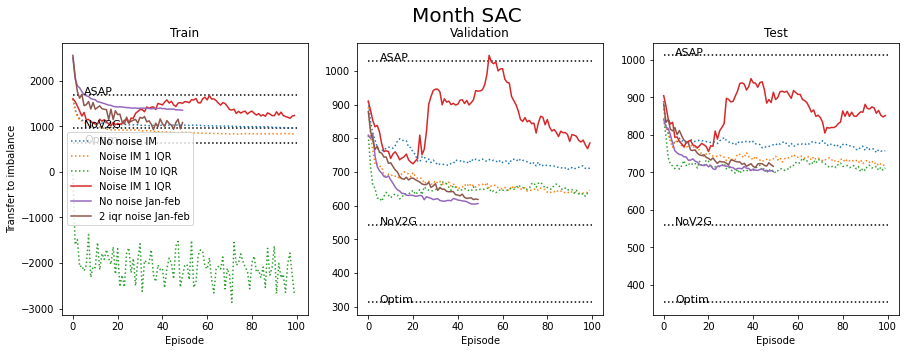

In [20]:
# Month

df_m_train, df_m_val, df_m_test = load_rl_gen("month_sac_gen_a", 100)
df_m2_train, df_m2_val, df_m2_test = load_rl_gen("month_sac_gen_b", 100) # Questionable procedure for noise
df_m3_train, df_m3_val, df_m3_test = load_rl_gen("month_sac_gen_c", 100) # Noise 10 IQR, good proc for noise?
df_m4_train, df_m4_val, df_m4_test = load_rl_gen("month_sac_gen_d", 100) # Noise 1 IQR, good proc for noise
df_m5_train, df_m5_val, df_m5_test = load_rl_gen("month_sac_gen_e", 50) # 2 monrths train, no noise 
df_m6_train, df_m6_val, df_m6_test = load_rl_gen("month_sac_gen_f", 50) # 2 monrths train, 2iqr noise 

fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)


ax1 = draw_hlines(ax1, df_jan_ASAP["imbalance_bill"].sum(), df_jan_NoV2G["imbalance_bill"].sum(), df_jan_Optim["imbalance_bill"].sum(), x_max = 100)
ax2 = draw_hlines(ax2, df_feb_ASAP["imbalance_bill"].sum(), df_feb_NoV2G["imbalance_bill"].sum(), df_feb_Optim["imbalance_bill"].sum(), x_max = 100)
ax3 = draw_hlines(ax3, df_mar_ASAP["imbalance_bill"].sum(), df_mar_NoV2G["imbalance_bill"].sum(), df_mar_Optim["imbalance_bill"].sum(), x_max = 100)

ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m_train, df_m_val, df_m_test, label="No noise IM", ls=":")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m2_train, df_m2_val, df_m2_test, label="Noise IM 1 IQR", ls=":")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m3_train, df_m3_val, df_m3_test, label="Noise IM 10 IQR", ls=":")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m4_train, df_m4_val, df_m4_test, label="Noise IM 1 IQR")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m5_train, df_m5_val, df_m5_test, label="No noise Jan-feb")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m6_train, df_m6_val, df_m6_test, label="2 iqr noise Jan-feb")

ax1.set_title("Train")
ax2.set_title("Validation")
ax3.set_title("Test")

ax1.set_ylabel("Transfer to imbalance")
ax1.legend()
fig1.suptitle("Month SAC", fontsize = 20)

Text(0.5, 0.98, 'SAC')

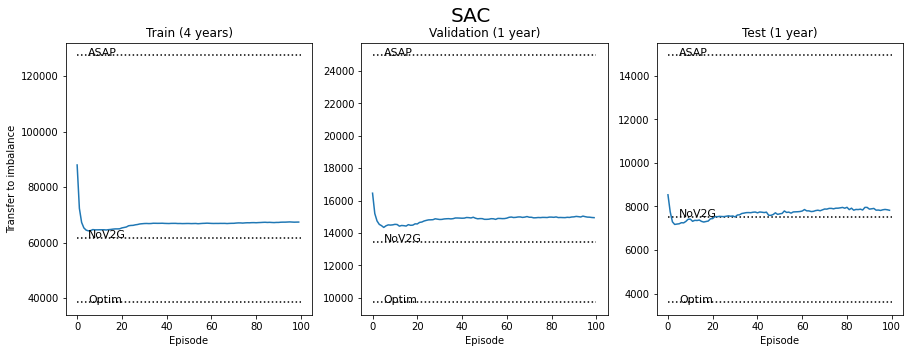

In [21]:
# Year
df_train, df_val, df_test = load_rl_gen("sac_c", 100)
#df_train, df_val, df_test = load_rl_gen("sac_d_c", 6)

fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)

ax1 = draw_hlines(ax1, asap_train["imbalance_bill"].sum(), nov2g_train["imbalance_bill"].sum(), optim_train["imbalance_bill"].sum())
ax2 = draw_hlines(ax2, asap_val["imbalance_bill"].sum(), nov2g_val["imbalance_bill"].sum(), optim_val["imbalance_bill"].sum())
ax3 = draw_hlines(ax3, asap_test["imbalance_bill"].sum(), nov2g_test["imbalance_bill"].sum(), optim_test["imbalance_bill"].sum())

ax1.plot(df_train["transf"])
ax2.plot(  df_val["transf"])
ax3.plot( df_test["transf"])

ax1.set_title("Train (4 years)")
ax2.set_title("Validation (1 year)")
ax3.set_title("Test (1 year)")

ax1.set_ylabel("Transfer to imbalance")

fig1.suptitle("SAC", fontsize = 20)

## Buffer size

Text(0.5, 1.0, 'Month SAC Buffersize')

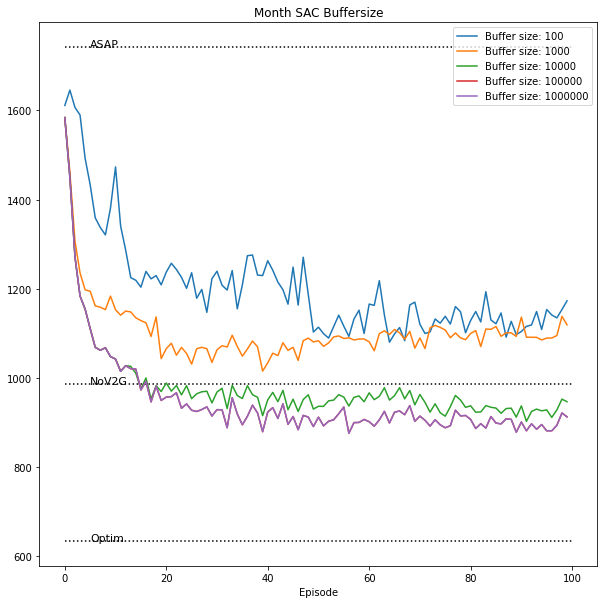

In [22]:
month_a_str = ["./../ExpLogs/summ_month_sac_IX_a_{}.csv".format(i) for i in range(100)]   
month_b_str = ["./../ExpLogs/summ_month_sac_IX_b_{}.csv".format(i) for i in range(100)]   
month_c_str = ["./../ExpLogs/summ_month_sac_IX_c_{}.csv".format(i) for i in range(100)]   
month_d_str = ["./../ExpLogs/summ_month_sac_IX_d_{}.csv".format(i) for i in range(100)]   
month_e_str = ["./../ExpLogs/summ_month_sac_IX_e_{}.csv".format(i) for i in range(100)]   

df_month_a = pd.concat([pd.read_csv(i) for i in month_a_str], axis=0).reset_index(drop=True)
df_month_b = pd.concat([pd.read_csv(i) for i in month_b_str], axis=0).reset_index(drop=True)
df_month_c = pd.concat([pd.read_csv(i) for i in month_c_str], axis=0).reset_index(drop=True)
df_month_d = pd.concat([pd.read_csv(i) for i in month_d_str], axis=0).reset_index(drop=True)
df_month_e = pd.concat([pd.read_csv(i) for i in month_e_str], axis=0).reset_index(drop=True)

fig1, (ax1) = plt.subplots(1,1, figsize=(10,10))

ax1 = draw_hlines(ax1, asap_test["imbalance_bill"][:768].sum(), nov2g_test["imbalance_bill"][:768].sum(), optim_test["imbalance_bill"][:768].sum())
ax1.plot(df_month_a["transf"], label = "Buffer size: 100")
ax1.plot(df_month_b["transf"], label = "Buffer size: 1000")
ax1.plot(df_month_c["transf"], label = "Buffer size: 10000")
ax1.plot(df_month_d["transf"], label = "Buffer size: 100000")
ax1.plot(df_month_e["transf"], label = "Buffer size: 1000000")

ax1.legend()

ax1.set_title("Month SAC Buffersize")

#/summ_month_sac_IX_e_94.csv

In [23]:
# Notes
df_train, df_val, df_test = load_rl_gen("month_sac_d", 3)
display(df_train.head())
display(df_val.head())
display(df_test.head())

,name,transf,client,payoff,total
0,train_month_sac_d_0,1583.547583,1469.562214,135.214407,-249.199776
1,train_month_sac_d_1,1290.695682,1469.562214,135.214407,43.652126
2,train_month_sac_d_2,1198.703552,1469.562214,135.214407,135.644256


,name,transf,client,payoff,total
0,val_month_sac_d_0,2278.333267,2277.450961,145.307986,-146.190293
1,val_month_sac_d_1,2056.834365,2277.450961,145.307986,75.308609
2,val_month_sac_d_2,2020.477284,2277.450961,145.307986,111.665690


,name,transf,client,payoff,total
0,test_month_sac_d_0,1736.844074,2289.492688,157.201251,395.447363
1,test_month_sac_d_1,1574.938689,2289.492688,157.201251,557.352748
2,test_month_sac_d_2,1488.377481,2289.492688,157.201251,643.913956


## Monthly optim

In [45]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
agents = ["ASAP", "NoV2G", "Optim"]
l_summ_month = []
for i in range(12):
    # Concatate pandas dataframes
    l_summ_agents = []
    for agent in agents:
        df_month = pd.read_csv(f"./../ExpLogs/summ_{months[i].lower()}_{agent}.csv")
        df_month = df_month[["transf", "client", "payoff", "total"]]
        df_month = df_month.rename(columns={"transf": f"transf_{agent.lower()}",
                                            "client": f"client_{agent.lower()}",
                                            "payoff": f"payoff_{agent.lower()}",
                                            "total":  f"total_{agent.lower()}",})
        l_summ_agents.append(df_month)
    df_month_agents = pd.concat(l_summ_agents, axis=1)
    df_month_agents["month"] = months[i]
    df_month_agents["idx_month"] = i
    l_summ_month.append(df_month_agents)

df_year = pd.concat(l_summ_month, axis=0).reset_index(drop=True)
df_year


,transf_asap,client_asap,payoff_asap,total_asap,transf_nov2g,client_nov2g,payoff_nov2g,total_nov2g,transf_optim,client_optim,payoff_optim,total_optim,month,idx_month
0,1689.668779,1469.562214,0,-220.106564,963.661917,1469.562214,0,505.900298,627.726666,1469.562214,138.628529,703.207020,Jan,0
1,1029.567958,1349.047258,0,319.479300,542.264931,1349.047258,0,806.782327,312.847479,1349.047258,120.388091,915.811688,Feb,1
2,1012.411478,1488.309120,0,475.897642,560.908452,1488.309120,0,927.400668,353.033254,1488.309120,155.962898,979.312968,Mar,2
3,1302.818178,1468.334912,0,165.516734,784.815804,1468.334912,0,683.519108,397.395422,1468.334912,148.508029,922.431461,Apr,3
4,1024.363474,1329.610918,0,305.247445,643.267146,1329.610918,0,686.343772,448.287693,1329.610918,129.108311,752.214915,May,4
5,1013.169713,1266.986394,0,253.816681,515.117967,1266.986394,0,751.868427,137.989874,1266.986394,144.774567,984.221952,Jun,5
6,834.412482,1233.971674,0,399.559192,479.295076,1233.971674,0,754.676598,229.983578,1233.971674,130.454938,873.533158,Jul,6
7,814.571575,1006.899328,0,192.327753,466.518536,1006.899328,0,540.380792,239.382334,1006.899328,88.347085,679.169908,Aug,7
8,1076.944849,1488.591987,0,411.647138,419.230270,1488.591987,0,1069.361718,17.915567,1488.591987,150.614229,1320.062192,Sep,8
9,1425.500113,1835.451533,0,409.951420,559.877027,1835.451533,0,1275.574506,27.691848,1835.451533,187.401715,1620.357970,Oct,9


Text(0, 0.5, 'Total profit')

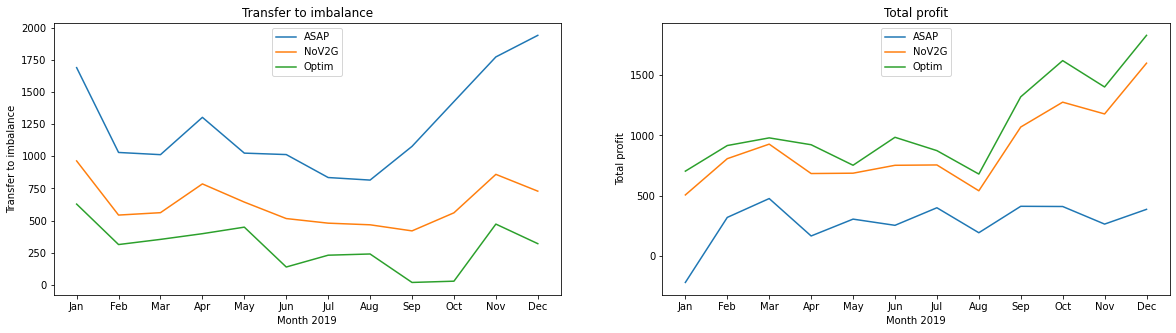

In [54]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.plot(df_year["transf_asap"], label = "ASAP")
ax1.plot(df_year["transf_nov2g"], label = "NoV2G")
ax1.plot(df_year["transf_optim"], label = "Optim")

ax2.plot(df_year["total_asap"], label = "ASAP")
ax2.plot(df_year["total_nov2g"], label = "NoV2G")
ax2.plot(df_year["total_optim"], label = "Optim")

ax1.set_xticks(df_year["idx_month"])
ax1.set_xticklabels(df_year["month"])
ax2.set_xticks(df_year["idx_month"])
ax2.set_xticklabels(df_year["month"])
ax1.legend(loc = "upper center")
ax2.legend(loc = "upper center")

ax1.set_title("Transfer to imbalance")
ax2.set_title("Total profit")
ax1.set_xlabel("Month 2019")
ax2.set_xlabel("Month 2019")
ax1.set_ylabel("Transfer to imbalance")
ax2.set_ylabel("Total profit")

#ax1.set_ylim(0, 1.1*df_year["transf_asap"].max())